In [6]:
include("./common.jl")

Common libraries imported and functions defined


In [145]:
function make_s(N, k)
    x = (0:N-1) .* ((2π/N) * k)im
    e.^x / sqrt(N)
end

make_s (generic function with 1 method)

In [133]:
s0 = make_s(10, 0)
s1 = make_s(10, 9)
dot(s0, s1)

4.718447854656915e-16 + 4.649058915617843e-16im

In [75]:
function make_v(N, i)
    [i; i+1; i+2]
end

make_v (generic function with 1 method)

In [147]:
function make_B(N)
    B = Array{Complex{Float64}}(N, 0)
    for k in 0:N-1
        B = hcat(B, make_s(N, k))
    end
    B
end

make_B (generic function with 1 method)

## DFT Example

In [1]:
using PortAudio
using LibSndFile

In [9]:
stream = PortAudioStream()

PortAudio.PortAudioStream{Float32}
  Samplerate: 44100.0Hz
  Buffer Size: 4096 frames
  2 channel sink: "default"
  2 channel source: "default"

In [3]:
snd = load("lifebacktomusic_loop.wav")
track = snd.data[:,2]
size(track)

(387041,)

In [127]:
track1 = track[1:88200]
size(track1)

(88200,)

In [128]:
write(stream, track1)

88200

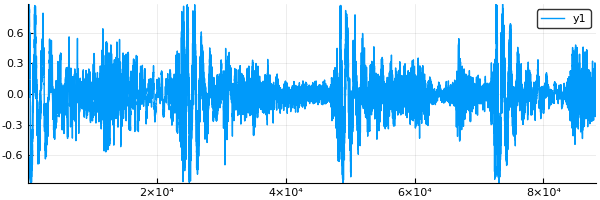

In [129]:
x = track1
n = 1:size(track1)[1]
plot(n, x, size=(600,200))

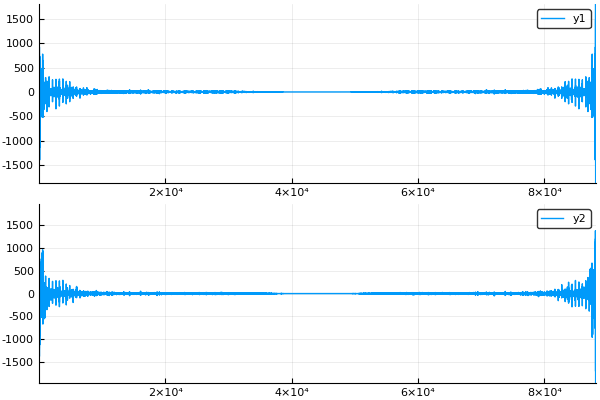

In [130]:
X = fft(x)
plot(n, [real(X) imag(X)], layout=(2,1), size=(600,400))

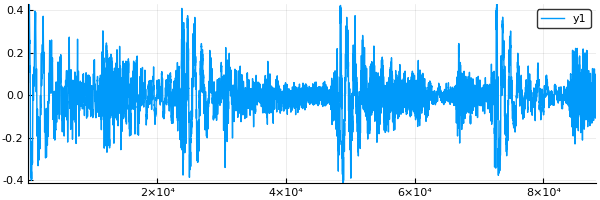

In [141]:
x2 = ifft(X2)
n = 1:size(x2)[1]
plot(n, real(x2), size=(600,200))

In [142]:
write(stream, real(x2))

88200

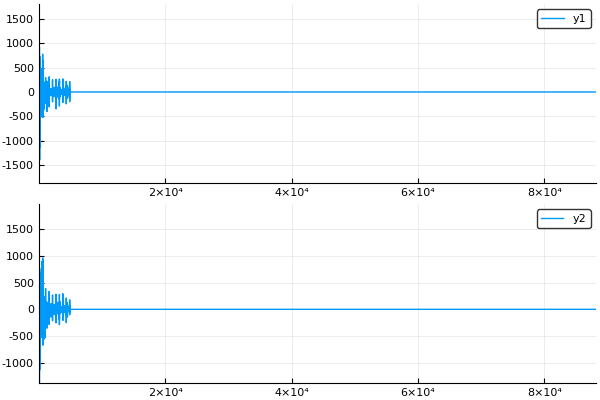

In [140]:
X2 = X
X2[5000:end] = 0
plot(n, [real(X2) imag(X2)], layout=(2,1), size=(600,400))

## My Own FT

In [152]:
B = make_B(3)

3×3 Array{Complex{Float64},2}:
 0.57735+0.0im    0.57735+0.0im    0.57735+0.0im
 0.57735+0.0im  -0.288675+0.5im  -0.288675-0.5im
 0.57735+0.0im  -0.288675-0.5im  -0.288675+0.5im

In [150]:
x = [1; 2; 3]

3-element Array{Int64,1}:
 1
 2
 3

In [151]:
fft(x)

3-element Array{Complex{Float64},1}:
  6.0+0.0im     
 -1.5+0.866025im
 -1.5-0.866025im

In [161]:
y = (sqrt(3) .* B') * x

3-element Array{Complex{Float64},1}:
  6.0+0.0im     
 -1.5+0.866025im
 -1.5-0.866025im

In [158]:
(B ./ sqrt(3)) * y

3-element Array{Complex{Float64},1}:
 1.0-1.05471e-15im
 2.0-2.22045e-16im
 3.0+4.44089e-16im